Topic: House Price Prediction using Machine Learning

Description: This project aims at building a model of house prices to predict median house values in the United States using provided dataset. This model should learn from the data and be able to predict the median house price in any city given all the other matrices. Predicting house prices can help to determine the selling price of a house in a particular city and can help people to find the right time to buy a home

Name: Oluwaseun Ojo

Student Number: 202194682

Tools: Scikit-learn, Matplotlib, Pandas, Seaborn, Numpy, Scipy




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import data
data = pd.read_csv('./data.csv')

df = pd.DataFrame(data)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Exploratory Data Analysis & Data Visualization

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4311 non-null   float64
 1   bedrooms       4311 non-null   int64  
 2   bathrooms      4311 non-null   float64
 3   sqft_living    4311 non-null   int64  
 4   sqft_lot       4311 non-null   int64  
 5   floors         4311 non-null   float64
 6   waterfront     4311 non-null   int64  
 7   view           4311 non-null   int64  
 8   condition      4311 non-null   int64  
 9   sqft_above     4311 non-null   int64  
 10  sqft_basement  4311 non-null   int64  
 11  yr_built       4311 non-null   int64  
 12  yr_renovated   4311 non-null   int64  
 13  street         4311 non-null   object 
 14  city           4311 non-null   object 
 15  statezip       4311 non-null   object 
 16  country        4311 non-null   object 
dtypes: float64(3), int64(10), object(4)
memory usage: 60

((array([-3.59729352, -3.35962078, -3.22850623, ...,  3.22850623,
          3.35962078,  3.59729352]),
  array([   7800.,   80000.,   83000., ..., 1150000., 1150000., 1150000.])),
 (211053.47018078362, 487456.9019044305, 0.9780093595349805))

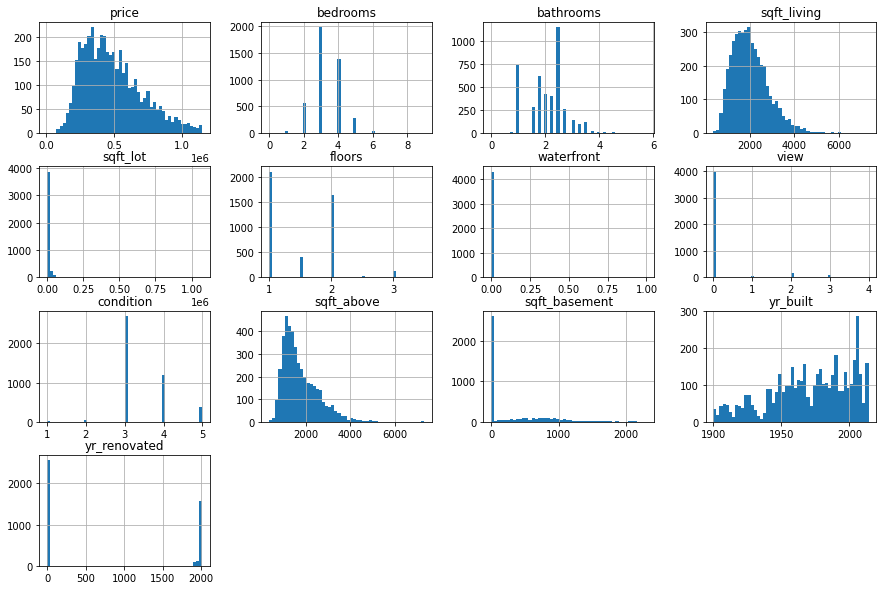

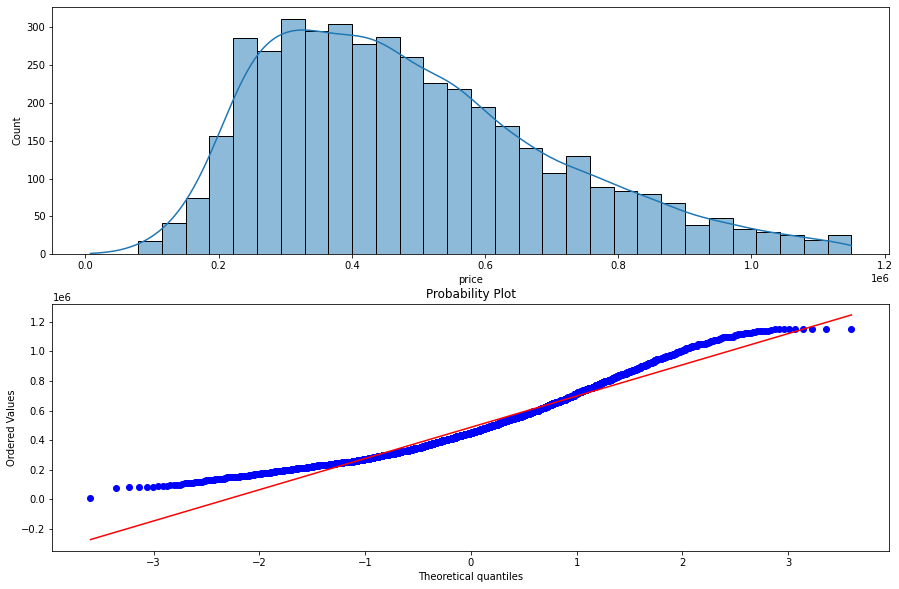

In [4]:
import seaborn as sns
from scipy import stats
from matplotlib import style
from matplotlib.gridspec import GridSpec

from outliers import outliers

#plotting all the data using matplotlib
data.info()
data.hist(bins=50, figsize=(15, 10))
plt.grid()

#PRICE VISUALIZATION

#remove outliers in price
data = outliers.remove_outliers(data, 'price')

fig = plt.figure(figsize=(15, 10))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

# Price Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(data['price'], ax=ax1, kde=True)

# Price QQ plot
ax2 = fig.add_subplot(grid[1, :])
stats.probplot(data['price'], plot=ax2)